# Homework 8
Nina Nurrahmawati / nn1221

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


I use 311 data that I downloaded from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data). The data have been filtered by complaint type of heating and heat/hot water between October 1 and May 31, from 2010 - 2017. New York City allows complaint regarding residential building that does not have enough heat only between October 1 and May 31 [(source)](http://www1.nyc.gov/site/hpd/owners/heat-hot-water.page), therefore this assignment will use data from October 1 to May 31.

In [2]:
url = 'https://www.dropbox.com/s/obk0nbwtvhcu6gm/311_HEAT.csv?dl=1'

In [3]:
# import data
data = pd.read_csv(url)
data.head(2)

,Created Date,Complaint Type,Incident Zip,Borough,Latitude,Longitude,Location
0,10/01/2015 10:01:05 PM,HEAT/HOT WATER,10467.0,BRONX,40.876181,-73.866978,"(40.87618083436069, -73.86697786061319)"
1,10/01/2015 11:55:22 AM,HEAT/HOT WATER,10314.0,STATEN ISLAND,40.594191,-74.190990,"(40.59419093569641, -74.19099045799757)"


In [4]:
# data cleaning 
data.columns = ['Date', 'Frequency', 'Zipcode', 'Borough', 'Latitude', 'Longitude', 'Location']

# eliminate all zip code outside NYC and change to integer
data = data[data['Zipcode'] < 12000 ]
data['Zipcode'] = data.Zipcode.astype(int)

In [5]:
# set datetime
data['Date'] = data['Date'].str[:19]
data['Date'] = pd.to_datetime(data.Date)
data['Year'] = data['Date'].dt.strftime('%Y')
data['YearMonth'] = data['Date'].dt.strftime('%Y/%m')
data['Month'] = data['Date'].dt.strftime('%b')

In [6]:
# create new dataframe
winter2016 = data[(data['Date']>dt.date(2016,10,1)) & (data['Date']<dt.date(2017,5,31))]
winter2015 = data[(data['Date']>dt.date(2015,10,1)) & (data['Date']<dt.date(2016,5,31))]
winter2014 = data[(data['Date']>dt.date(2014,10,1)) & (data['Date']<dt.date(2015,5,31))] 
winter2013 = data[(data['Date']>dt.date(2013,10,1)) & (data['Date']<dt.date(2014,5,31))] 
winter2012 = data[(data['Date']>dt.date(2012,10,1)) & (data['Date']<dt.date(2013,5,31))] 
winter2011 = data[(data['Date']>dt.date(2011,10,1)) & (data['Date']<dt.date(2012,5,31))] 
winter2010 = data[(data['Date']>dt.date(2010,10,1)) & (data['Date']<dt.date(2011,5,31))] 

df16 = winter2016.groupby(['Zipcode']).size().reset_index()
df15 = winter2015.groupby(['Zipcode']).size().reset_index()
df14 = winter2014.groupby(['Zipcode']).size().reset_index()
df13 = winter2013.groupby(['Zipcode']).size().reset_index()
df12 = winter2012.groupby(['Zipcode']).size().reset_index()
df11 = winter2011.groupby(['Zipcode']).size().reset_index()
df10 = winter2010.groupby(['Zipcode']).size().reset_index()

m1 = pd.merge(df10, df11, on='Zipcode', how='inner') 
m2 = pd.merge(df12, df13, on='Zipcode', how='inner') 
m3 = pd.merge(df14, df15, on='Zipcode', how='inner') 
m4 = pd.merge(m1, m2, on='Zipcode', how='inner') 
m5 = pd.merge(m3, df16, on='Zipcode', how='inner') 

df = pd.merge(m4, m5, on='Zipcode', how='inner') 
df.columns = ['Zipcode', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [7]:
w2010 = winter2010.groupby(['YearMonth']).count()
w2011 = winter2011.groupby(['YearMonth']).count()
w2012 = winter2012.groupby(['YearMonth']).count()
w2013 = winter2013.groupby(['YearMonth']).count()
w2014 = winter2014.groupby(['YearMonth']).count()
w2015 = winter2015.groupby(['YearMonth']).count()
w2016 = winter2016.groupby(['YearMonth']).count()

In [8]:
w2010['Date'] = ['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
w2010['Year'] = ['2010'] * 8
w2010 = w2010.drop(['Zipcode', 'Borough', 'Latitude', 'Longitude',
       'Location', 'Month'], axis=1)
w2011['Date'] = ['October', 'November', 'December', 'January', 'February', 
                 'March', 'April', 'May']
w2011['Year'] = ['2011'] * 8
w2011 = w2011.drop(['Zipcode', 'Borough', 'Latitude', 'Longitude',
       'Location', 'Month'], axis=1)
w2012['Date'] = ['October', 'November', 'December', 'January', 'February', 
                 'March', 'April', 'May']
w2012['Year'] = ['2012'] * 8
w2012 = w2012.drop(['Zipcode', 'Borough', 'Latitude', 'Longitude',
       'Location', 'Month'], axis=1)
w2013['Date'] = ['October', 'November', 'December', 'January', 'February', 
                 'March', 'April', 'May']
w2013['Year'] = ['2013'] * 8
w2013 = w2013.drop(['Zipcode', 'Borough', 'Latitude', 'Longitude',
       'Location', 'Month'], axis=1)
w2014['Date'] = ['October', 'November', 'December', 'January', 'February', 
                 'March', 'April', 'May']
w2014['Year'] = ['2014'] * 8
w2014 = w2014.drop(['Zipcode', 'Borough', 'Latitude', 'Longitude',
       'Location', 'Month'], axis=1)
w2015['Date'] = ['October', 'November', 'December', 'January', 'February', 
                 'March', 'April', 'May']
w2015['Year'] = ['2015'] * 8
w2015 = w2015.drop(['Zipcode', 'Borough', 'Latitude', 'Longitude',
       'Location', 'Month'], axis=1)
w2016['Date'] = ['October', 'November', 'December', 'January', 'February', 
                 'March', 'April', 'May']
w2016['Year'] = ['2016'] * 8
w2016 = w2016.drop(['Zipcode', 'Borough', 'Latitude', 'Longitude',
       'Location', 'Month'], axis=1)

In [9]:
# Concatenating
frames = [w2010, w2011, w2012, w2013, w2014, w2015, w2016]
df = pd.concat(frames)

In [10]:
df.columns = ['Months', 'Frequency', 'Winter Term']
df.head()

,Months,Frequency,Winter Term
YearMonth,,,
2010/10,October,19511,2010
2010/11,November,37269,2010
2010/12,December,51361,2010
2011/01,January,39616,2010
2011/02,February,24652,2010


In [11]:
# pivot table
table = df.pivot_table(index='Winter Term',columns='Months',values='Frequency')
table

Months,April,December,February,January,March,May,November,October
Winter Term,,,,,,,,
2010,11783,51361,24652,39616,21740,4258,37269,19511
2011,11189,32444,21443,37770,15283,3999,25301,22059
2012,11477,29861,19305,43511,20525,5457,40309,12987
2013,13381,32741,28938,59859,23241,4195,35280,14913
2014,13525,31701,49582,49101,22958,4538,42455,16730
2015,12885,22360,38162,48405,17741,7637,27566,25486
2016,10727,41963,23296,33996,31102,7356,28484,22488


In [12]:
table = table[['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']]
table

Months,October,November,December,January,February,March,April,May
Winter Term,,,,,,,,
2010,19511,37269,51361,39616,24652,21740,11783,4258
2011,22059,25301,32444,37770,21443,15283,11189,3999
2012,12987,40309,29861,43511,19305,20525,11477,5457
2013,14913,35280,32741,59859,28938,23241,13381,4195
2014,16730,42455,31701,49101,49582,22958,13525,4538
2015,25486,27566,22360,48405,38162,17741,12885,7637
2016,22488,28484,41963,33996,23296,31102,10727,7356


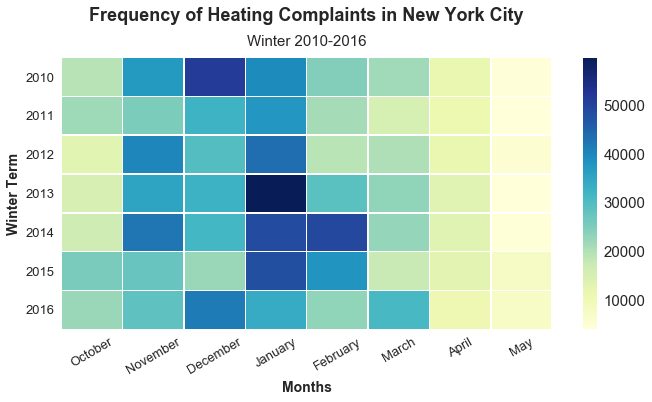

In [22]:
pl.figure(figsize=(11,5))
pl.suptitle('Frequency of Heating Complaints in New York City',fontsize=18,fontweight='bold',y=1.02, x=0.435)
pl.title('Winter 2010-2016',fontsize=15,y=1.02)
sns.heatmap(table, linewidths=0.5, cmap='YlGnBu')
pl.xlabel('Months', fontsize=14, fontweight='bold')
pl.ylabel('Winter Term', fontsize=14, fontweight='bold')
pl.xticks(rotation=30, fontsize=13)
pl.yticks(fontsize=13, rotation=0)
pl.show()

**Figure 1.** Heating complaints frequencies through 311 calls data in New York City during Winter period of 2010-2016.